📁 Archivos montados desde input:
/kaggle/input/xception5o/tensorflow2/default/1/xception_deepfake_image_5o.h5
/kaggle/input/prueba/facefusion_iker_jimenez.mp4
/kaggle/input/prueba/FromDNItoFace.mp4
/kaggle/input/prueba/FromFace2DNI.png
/kaggle/input/prueba/DNI_chatgtp.png
/kaggle/input/prueba/DNIfictiohombre.mp4

✅ Modelo cargado: /kaggle/input/xception5o/tensorflow2/default/1/xception_deepfake_image_5o.h5
📸 10 fotogramas extraídos
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


,Frame,Label,Confidence
0,0,REAL,97.12%
1,1,REAL,86.03%
2,2,REAL,87.08%
3,3,REAL,94.75%
4,4,REAL,97.98%
5,5,REAL,95.93%
6,6,REAL,94.23%
7,7,REAL,97.32%
8,8,REAL,99.00%
9,9,REAL,93.22%



🔍 Resultado final: REAL — 5.73% probabilidad de FAKE


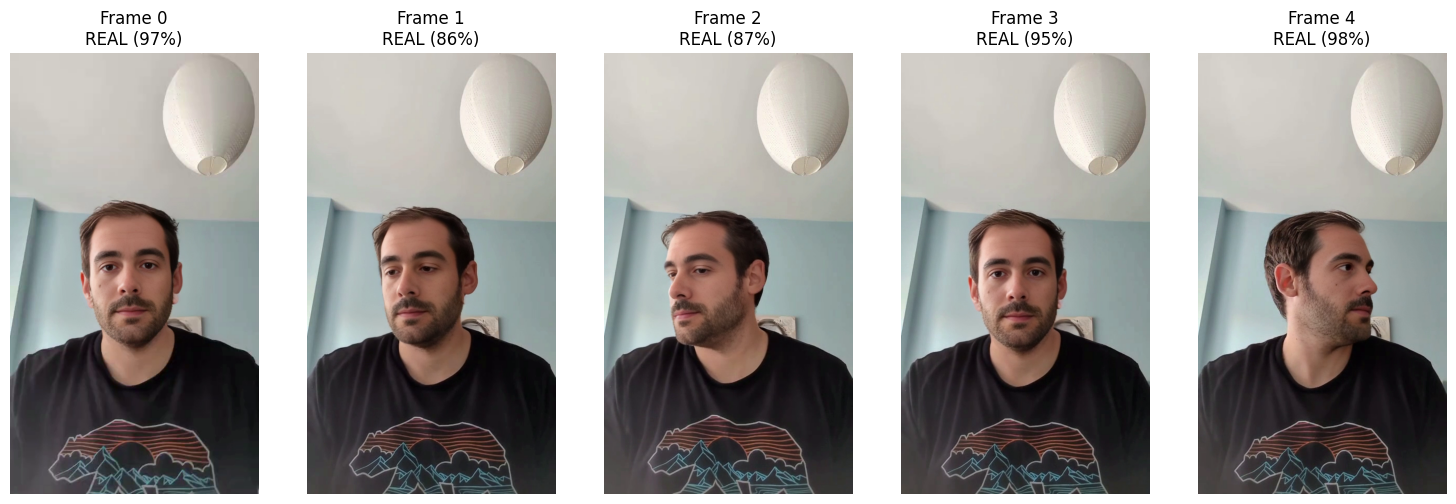

In [5]:
# ✅ IMPORTAR LIBRERÍAS
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.xception import preprocess_input

# ✅ MOSTRAR ARCHIVOS DISPONIBLES
print("📁 Archivos montados desde input:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# ✅ CARGAR MODELO (ajusta si el nombre es distinto)
model_path = "/kaggle/input/xception5o/tensorflow2/default/1/xception_deepfake_image_5o.h5"
model = load_model(model_path)
print(f"\n✅ Modelo cargado: {model_path}")

# ✅ RUTA DEL VIDEO A ANALIZAR (ajusta si subiste otro)
video_path = "/kaggle/input/video.mp4" # Cambia esta ruta
assert os.path.exists(video_path), f"❌ Video no encontrado: {video_path}"

# ✅ PARÁMETROS
NUM_FRAMES = 10  # número de fotogramas a extraer y analizar

# ✅ EXTRAER FRAMES DEL VIDEO
def extract_frames(video_path, num_frames=10):
    cap = cv2.VideoCapture(video_path)
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(1, total // num_frames)
    frames = []

    for i in range(0, total, step):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)
        if len(frames) >= num_frames:
            break
    cap.release()
    return frames

frames = extract_frames(video_path, NUM_FRAMES)
print(f"📸 {len(frames)} fotogramas extraídos")

# ✅ ANALIZAR CADA FRAME
results = []
for i, frame in enumerate(frames):
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(rgb, (299, 299))
    x = preprocess_input(resized.astype(np.float32))
    x = np.expand_dims(x, 0)

    pred = model.predict(x)[0][0]
    label = "REAL" if pred < 0.5 else "FAKE"
    confidence = (1 - pred) if label == "REAL" else pred
    results.append((i, label, confidence))

# ✅ MOSTRAR RESULTADOS POR FRAME
import pandas as pd

df = pd.DataFrame(results, columns=["Frame", "Label", "Confidence"])
display(df.style.format({"Confidence": "{:.2%}"}).highlight_max(axis=0, subset=["Confidence"]))

# ✅ PROMEDIO GLOBAL
fake_probs = [c if l == "FAKE" else 1 - c for _, l, c in results]
mean_fake = np.mean(fake_probs)
final_label = "REAL" if mean_fake < 0.5 else "FAKE"

print(f"\n🔍 Resultado final: {final_label} — {mean_fake:.2%} probabilidad de FAKE")

# ✅ VISUALIZAR ALGUNOS FRAMES
ncols = min(5, len(frames))
plt.figure(figsize=(15, 5))
for i in range(ncols):
    plt.subplot(1, ncols, i + 1)
    plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Frame {results[i][0]}\n{results[i][1]} ({results[i][2]:.0%})")
plt.tight_layout()
plt.show()
